## Assignment 3: Logistic Regression on Synthetic Data（20 marks）

**Task Description**

Complete the code in the blanks to accomplish the following tasks:
   - **Dataset Split and Plotting**: Split the given dataset into training and testing sets, and visualize the dataset.
   - **Logistic Regression**: Implement the gradient descent algorithm to optimize the weights.
   - **Result Plotting**: Plot the accuracy and loss curve of the classifier.


### Task 1. Dataset Split and Plotting (3 marks)

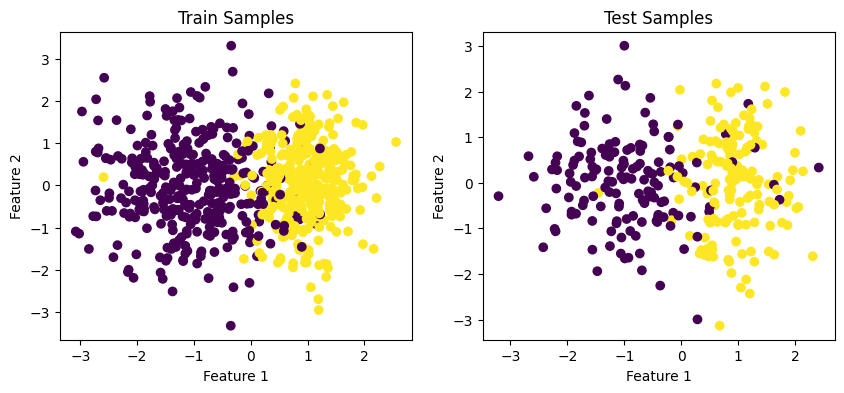

In [9]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

x, y = make_classification(n_samples = 1000, n_features=2, n_redundant=0, 
                           n_informative=1, n_clusters_per_class=1,random_state=2)
X = np.concatenate((np.ones((x.shape[0],1)), x),axis=1)

# Divide the dataset into training and test data in a ratio of 7:3 (1 marks)
train_X, train_y = X[:700], y[:700]
test_X, test_y = X[700:], y[700:]


#Plot train and test samples
plt.figure(figsize=[10,4])

plt.subplot(1,2,1)
plt.title("Train Samples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter(train_X[:, 1], train_X[:, 2], c=train_y) # Draw the training samples in the figure with color (1 marks)

plt.subplot(1,2,2)
plt.title("Test Samples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter(test_X[:, 1], test_X[:,2], c=test_y) # Draw the test samples in the figure with color (1 marks)

### Task 2. Logistic Regression (13 marks)

In [12]:
theta = np.array([[1.0],    # Initialize the weights
                  [2.0],
                  [1.0]])

train_y = train_y.reshape(-1,1)
test_y = test_y.reshape(-1,1)

alpha = 0.002            # Initialize the learning rate
train_loss_list = []    # Initialize the training loss list
test_loss_list = []     # Initialize the test loss list
train_acc_list = []     # Initialize the training accuracy list
test_acc_list = []      # Initialize the test accuracy list

for epoch in range(20000): 
    
    # Calculate the Linear Summation & Sigmoid Function (2 marks)
    z = train_X@theta # Linear Summation
    a = 1/ (1 + np.exp(-z))   # Sigmoid Function 

    # Calculate the training loss of each iteration (2 marks)
    train_loss =  -np.mean(train_y * np.log(a) + (1 - train_y) * np.log(1 - a)) # binary cross entropy formula
    train_loss_list.append(train_loss)
    
    # Calculate the training accuracy of each iteration (2 marks)
    train_pred_list=[]
    for i in a:
        if(i >= 0.5):
            train_pred_list.append(1)
        else:
            train_pred_list.append(0)
    count=0
    for i in (np.array(train_pred_list)-train_y.reshape(-1)):
        if(i == 0):
            count+=1
    train_acc = count / len(train_y)
    train_acc_list.append(train_acc)
    
    # Calculate the test loss of each iteration (3 marks)
    test_z = test_X@theta
    test_a = 1 / (1 + np.exp(-test_z))
    test_loss = -np.mean(test_y * np.log(test_a) + (1 - test_y) * np.log(1 - test_a))
    test_loss_list.append(test_loss)
    
    # Calculate the test accuracy of each iteration (2 marks)
    test_pred_list=[]
    for i in test_a:
        if(i >= 0.5):
            test_pred_list.append(1)
        else:
            test_pred_list.append(0)
    count=0
    for i in (np.array(test_pred_list)-test_y.reshape(-1)):
        if(i == 0):
            count+=1
    test_acc = count / len(test_y)
    test_acc_list.append(test_acc)
    
    # Update the weights using Gradient Descent (2 marks)
    
    theta -= alpha * ((train_X.T) @ (a - train_y)) / len(train_y)

### Task 3. Result Plotting (4 marks)

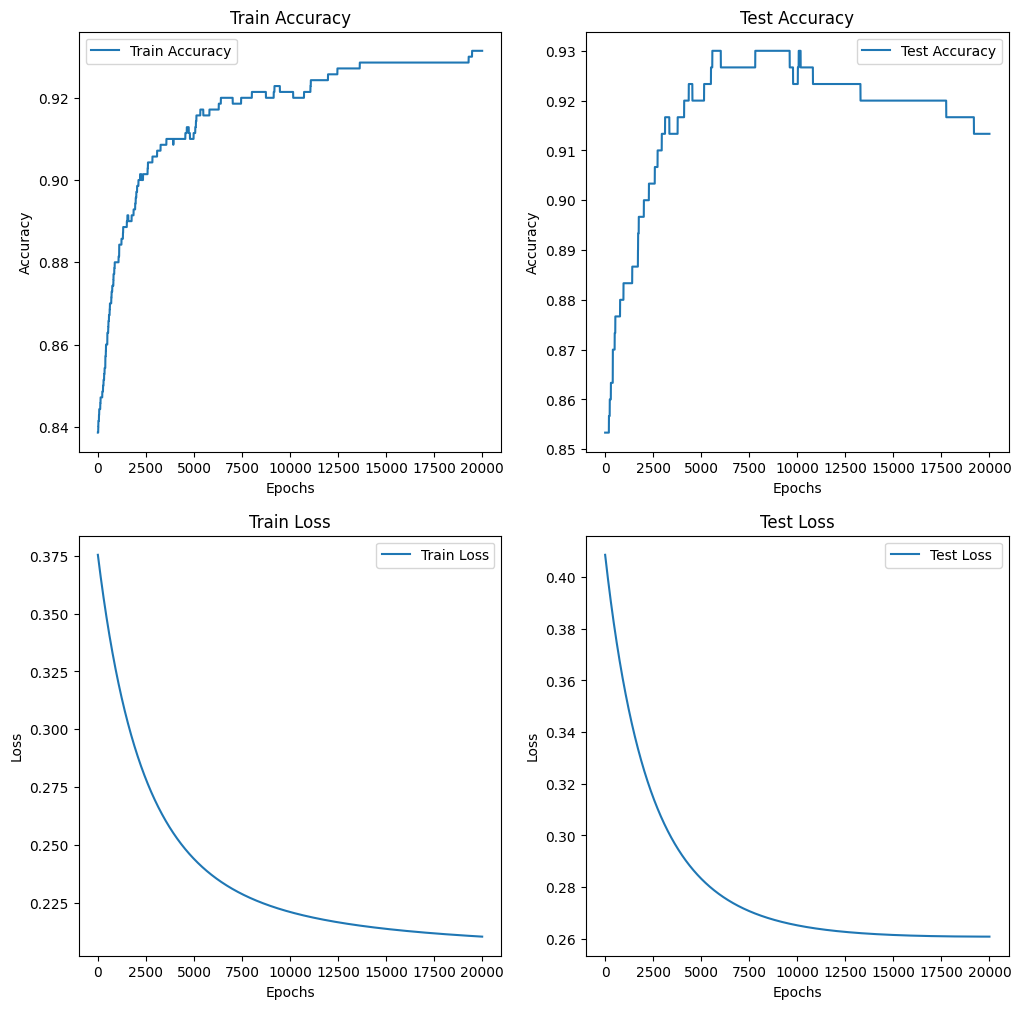

In [13]:
plt.figure(figsize=[12,12])

# Draw the training accuracy curve of the classifier in the figure (1 marks)
plt.subplot(2, 2, 1) 
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(train_acc_list, label="Train Accuracy")
plt.legend()

# Draw the test accuracy curve of the classifier in the figure (1 marks)
plt.subplot(2, 2, 2) 
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(test_acc_list, label="Test Accuracy")
plt.legend()

# Draw the training loss curve of the classifier in the figure (1 marks)
plt.subplot(2, 2, 3) 
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(train_loss_list, label="Train Loss")
plt.legend()

# Draw the test loss curve of the classifier in the figure (1 marks)
plt.subplot(2, 2, 4) 
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(test_loss_list, label="Test Loss ")
plt.legend()